In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
%matplotlib inline

In [20]:
path = Path.cwd()
data_dir = path / 'data'
data_dir

PosixPath('/home/jovyan/examples/examples/tensorflow/data')

In [3]:
dataset_url = 'https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip'
if not data_dir.exists():
    !wget dataset_url
    !unzip data.zip

(1, 240, 320, 3)


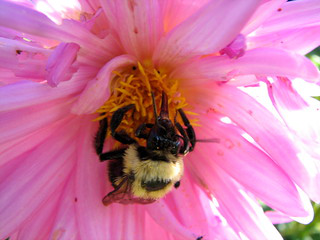

In [37]:
path = data_dir / 'train/bee/'
name = '210144361_aac82685de_n.jpg'
fullname = path / name
img = load_img(fullname)
x = np.array(img)
X = np.array([x])
print(X.shape)
img

In [10]:
input_shape = (150, 150, 3)
learning_rate = 0.001
droprate = None

In [11]:
def make_model(learning_rate=0.001, droprate=None):

    base_model = Conv2D(
        input_shape=input_shape,
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu',
    )

    inputs = keras.Input(shape=input_shape)
    
    base = base_model(inputs, training=True)
    max_pool_2d = MaxPooling2D(pool_size=(2, 2))(base)
    vector = Flatten(max_pool_2d)
    
    inner = keras.layers.Dense(64, activation='relu')(vector)
    # drop = Dropout(droprate)(inner)

    outputs = Dense(1)(inner, activation='sigmoid')

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer = SGD(learning_rate),
        loss = CategoricalCrossentropy(),
        metrics = ['accuracy'],
    )

    return model

In [13]:
make_model()

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`